In [1]:
from SimpleMaze import *


In [2]:
from HierarchicalAgentFlatQ import *
from torch import nn
import torch.nn.functional as F
from torch import optim
import math
import numpy as np
from numpy.random import random_integers as rndint
import pandas as pd
import copy
import logging
import random
import os
import torch
from collections import defaultdict
from tqdm import tqdm as tqdm
from IPython.display import clear_output
check_dict={}
step_dict={}
x2=4
# for x2 in [4,16,24]:
step_size=2
env=Recursive_Maze(8,2,2,2,False)

print(env.goal_init_state)
assert env.maze[int(env.goal_init_state[0])][int(env.goal_init_state[1])]!=1
print(env.maze)
rewards=[]
HQT_new=HQT(env,step_size)
states_visited=[]
num_episodes=6000
epsilons=[]
import matplotlib.pyplot as plt
from tqdm import tqdm
logging.basicConfig(filename='examplenb.log', level=logging.DEBUG)

counter=0
result_dict={}
for reward_struct in [2]:
    env=Recursive_Maze(8,reward_struct,2,2,True)
    print(env.goal_init_state)
    assert env.maze[int(env.goal_init_state[0])][int(env.goal_init_state[1])]!=1
    state=env.loc
    stats={}
    for discount_factor in [1]:
        for df_mult in [1]:
            for lr_1 in [10]:
                step_list=[]
                rewards=[]
                for episode in tqdm(range(5000)):
                    action_state_dictionary={}
                    for i in range(env.n_layers+1):
                        action_state_dictionary[i]={}
                    env.reset()
                    r2=0
                    logging.debug('Reward Structure %s', reward_struct)

                    logging.debug('Goal State %s', env.goal_init_state)
                    print(env.goal_init_state)
                    clear_output(wait=True)
        #             discount_factor =.9
                    HQT_new.counter=0
                    AgentInit=copy.copy(env.loc)
                    GoalInit=copy.copy(env.goal_init_state)
                    print(env.loc)
                    path=[(env.loc,)]
                    step_counter=0
                    old_step_counter=0
                    d=False
                    logging.debug('Episode %s', episode)

                    while d!=True:
                        logging.debug('Step %s', step_counter)

                        # print(env.loc)
                        if lr_1==10:
                            lr=np.minimum(.98,episode/500+0.5)
                        else:
                            lr=lr_1
                        level2=copy.copy(env.current_level)
                        state_1=copy.copy(env.loc)
                        current_loc = copy.copy(env.loc)
                        current_level = copy.copy(env.current_level)
                        possible_actions_1=env.get_possible_actions(current_loc,current_level)
                        # print('actions',env.possible_actions)
                        a = HQT_new.choose_action(env, env.current_level, episode)
                        assert a in possible_actions_1
                        if env.current_level!=env.n_layers:

                            action_state_dictionary[level2]=env.get_super_manager_1(state_1)[level2]

                        print('state',state_1)
                        print('level',level2)
                        print('action',a)
                        # print('stask bools',env.tasks_bools)
                        # print('ha ',env.hierarchy_actions)

                        # if level2==1:
                        #     if a==4:
                        #         print('cc')
                        # print(state)
                        # print(env.get_super_manager_1(env.goal_init_state))
                        # print(env.get_super_manager_1(state_1))

                        if level2 == env.n_layers:
                            old_step_counter=step_counter
                            step_counter = step_counter + 1
                            # path.append((env.loc,a))
                        ns,nl,s,d,_=  env.step(a,step_counter)

                        # print('stask bools 2',env.tasks_bools)
                        # print('ha 2',env.hierarchy_actions)

                        # if level2==2:
                        #     if env.get_super_manager_1(state_1)!=env.get_super_manager_1(ns):
                        #         print('nabaager cgabge')
                        # print('old_level',level2)
                        # print('old_state',state_1)
                        # print('new level',nl)
                        print('new_state',ns)
                        # print(env.reset_reward)
                        if step_counter>old_step_counter:
                            # print('EL6', env.expected_level)

                            env.check_if_task_satisfied_at_senior_level(nl,ns,state_1, d)
                            # env.check_if_manager_change(nl, ns, state_1, d)
                            # env.expected_level=copy.copy(env.current_level)
                            # print('EL7', env.expected_level)

                            if env.expected_level!=0:
                                # if env.reset_reward[env.expected_level]==0:
                                # print('EL3', env.expected_level)
                                env.checks(nl,ns,state_1,d)
                                # print('EL4',env.expected_level)
                            else:
                                env.expected_level = nl
                        else:
                            env.expected_level=nl
                        if episode%250==0:
                            print(pd.Series(step_list).rolling(100).mean().tail(1))
                        old_reset=copy.copy(env.reset_reward)
                        # print(env.reset_reward)

                        r,d=env.get_reward(step_counter)
                        # print(env.reset_reward)
                        #
                        # if level2==2:
                        #     if r[-1]==0:
                        #         print('xxxx')
                        # if step_counter>0:
                        #     statex = env.get_super_manager_1(ns)[1]
                        #
                        #     c1 = statex != env.get_super_manager_1(env.goal_init_state)[1]
                        #     c2 = env.hierarchy_actions[1] == 4
                        #     if c1:
                        #         if c2:
                        #             print('WTF')
                        # print(',,,,,,,,,,,,,,,,,,,,,')
                        # print(state_1,ns)
                        # # print(env.get_super_manager_1(env.goal_init_state))
                        # print(env.get_super_manager_1(state_1),env.get_super_manager_1(state_1))
                        if step_counter>0:
                            if level2!=0:
                                statex = env.get_super_manager_1(state_1)[1]
                                c1 = statex == env.get_super_manager_1(env.goal_init_state)[1]
                                c2 = env.hierarchy_actions[1] != 4
                                if c1:
                                    if c2:
                                        print('WTF')
                                    # env.checks(nl, ns, d)
                        # print('checking')
                        # print(r)
                        # print(level2,a)
                        # print(env.reset_reward)

                        # if step_counter>0:
                        #
                        #     statex = env.get_super_manager_1(state_1)[1]
                        if d == True:
                            env.reset_reward = [5 for x in env.reset_reward]
                        for x in enumerate(old_reset):
                            level=x[0]
                            x=x[1]
                            if level2 == env.n_layers:
                                r2+=r[-1]
                                logging.debug('Episode  %s', episode)
                                logging.debug('step  %s', step_counter)
                                logging.debug('Reset_Reward %s',env.reset_reward)
                                logging.debug('Old Reset Reward %s',old_reset)
                                logging.debug('Task Assigned %s',env.tasks_bools)
                                logging.debug('Old State %s',state_1)
                                logging.debug('New State %s',ns)
                                logging.debug('Reward %s',r)
                                logging.debug('Action %s',a)
                                logging.debug('Current Tasks %s',env.current_tasks_loc)
                                logging.debug('Hierarchy Actions %s',env.hierarchy_actions)
                                logging.debug('Current level %s',level2)
                                logging.debug('Expected level %s',env.expected_level)










                                if level == env.n_layers:

                                    old_q_value,current_q_value,max_future=HQT_new.update_Q_values(env, ns, state_1, level2, r[level], a, env.hierarchy_actions[level - 1], d,
                                                            episode, num_episodes, discount_factor,lr,state_1,ns)
                                    logging.debug('Episode  %s', episode)
                                    logging.debug('step  %s', step_counter)
                                    logging.debug('Task  %s', env.hierarchy_actions[level - 1])
                                    logging.debug('level %s', level )
                                    logging.debug('action %s', a )

                                    logging.debug('Old Q Value  %s', old_q_value)
                                    logging.debug('Current Q Value %s', current_q_value)
                                    logging.debug('max future value %s', max_future)


                                else:
                                    if x!=0:
                                        state = env.get_super_manager_1(state_1)[level]
                                        # state=action_state_dictionary[level]
                                        ns_1 =env.get_super_manager_1(ns)[level]
                                        df_l=np.minimum(discount_factor/df_mult,1)

                                        if level==0:
                                            task=4
                                        else:
                                            task=env.hierarchy_actions[level-1]
                                            # print(state)
                                            # print(r[level])
                                        old_q_value,current_q_value,max_future=HQT_new.update_Q_values(env,ns_1, state, level, r[level], env.hierarchy_actions[level], task, d,episode,num_episodes,df_l,lr,state_1,ns)
                                        logging.debug('Episode  %s', episode)
                                        logging.debug('step  %s', step_counter)

                                        logging.debug('Task  %s', task)
                                        logging.debug('level %s', level )
                                        logging.debug('action %s', env.hierarchy_actions[level] )

                                        logging.debug('Old Q Value  %s', old_q_value)
                                        logging.debug('Current Q Value %s', current_q_value)
                                        logging.debug('max future value %s', max_future)


                        state=ns

                        if d != True:
                            env.reset_rewards_after_learning(old_reset)
                        else:
                            logging.debug('Done  %s', episode)
                        env.current_level = copy.copy(env.expected_level)
                    rewards.append(r2)
                    step_list.append(step_counter)
                    # stats[episode]={'epsilon':HQT_new.epsilon,'Reward':env.reward_per_level[0],'Steps':step_counter,'AgentInit':AgentInit,'Goal':GoalInit}
                    # epsilons.append(HQT_new.epsilon)


    #             stats_df=pd.DataFrame(stats).T
    #             check_dict[x2]={x:env.check_dicts[x][1] for x in env.check_dicts.keys()}
    #             step_dict[x2]=step_list

                result_dict[counter]={'Rewards':rewards,'Steps':step_list,'HQT':copy.copy(HQT_new),'Reward_Struct':reward_struct}
                counter=counter+1

                action_map = {}
                q_values = {}

                action_dict = {0: 'N', 1: 'S', 2: 'E', 3: 'W', 4: 'Search'}
                
                
                
                
                

[1, 6]
state [1, 6]
level 0
action 4
new_state [1, 6]
state [1, 6]
level 1
action 1
new_state [1, 6]
state [1, 6]
level 2
action 2
new_state [1, 7]
state [1, 7]
level 2
action 3
new_state [1, 6]
state [1, 6]
level 2
action 1
new_state [2, 6]
stask satisfied
state [2, 6]
level 1
action 1
new_state [2, 6]
state [2, 6]
level 2
action 1
new_state [3, 6]
state [3, 6]
level 2
action 1
new_state [4, 6]
stask satisfied
state [4, 6]
level 1
action 3
new_state [4, 6]
state [4, 6]
level 2
action 3
new_state [4, 5]
stask satisfied
state [4, 5]
level 1
action 2
new_state [4, 5]
state [4, 5]
level 2
action 2
new_state [4, 6]
stask satisfied
state [4, 6]
level 1
action 3
new_state [4, 6]
state [4, 6]
level 2
action 2
new_state [4, 7]
state [4, 7]
level 2
action 3
new_state [4, 6]
state [4, 6]
level 2
action 3
new_state [4, 5]
stask satisfied
state [4, 5]
level 1
action 3
new_state [4, 5]
state [4, 5]
level 2
action 3
new_state [4, 4]
state [4, 4]
level 2
action 3
new_state [4, 3]
stask satisfied
Sear

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [04:16<00:00, 19.51it/s]

state [4, 3]
level 0
action 4
new_state [4, 3]
state [4, 3]
level 1
action 4
new_state [4, 3]
state [4, 3]
level 2
action 3
new_state [4, 2]
Goal Found


<AxesSubplot:>

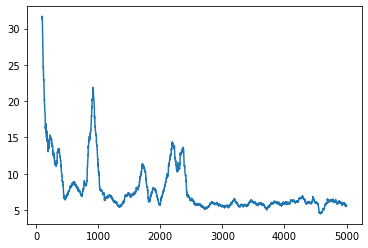

In [3]:
pd.Series(step_list).rolling(100).mean().plot()

In [4]:
np.array(list(range(64))).reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [5]:
action_level_1={}
for state in HQT_new.Q_table[1].keys():
    s1=state*4+state%4
    loc= [int(s1/8),int(s1-8*int(s1/8))]
    zz1 = int(int(s1 / 8) / 2) * 4 + int((s1 % 8) / 2)
    action_level_1[zz1]={}
    for task in [4]:
        
        allowed_actions=env.get_possible_actions(loc,1)
        t=4
        Qvalues={x:HQT_new.Q_table[1][zz1][t][x] for x in HQT_new.Q_table[1][zz1][t].keys() if x in allowed_actions}
        Best_action=allowed_actions[np.argmax([x for x in Qvalues.values()])]
        Action_Value=np.max([x for x in Qvalues.values()])
        print(zz1,allowed_actions,Qvalues)
        action_level_1[zz1][task]={action_dict[Best_action]:Action_Value}

0 [1, 2] {1: -81.65329473716342, 2: -94.11108126470042}
2 [1, 2, 3] {1: -95.31425942141796, 2: -101.02284258798016, 3: -82.83939769128116}
1 [1, 2, 3] {1: -82.6949700800888, 2: -92.44400244304785, 3: -93.38740934809147}
3 [1, 3] {1: -84.66612564445742, 3: -98.36582613189985}
4 [0, 1, 2] {0: -87.06978240407992, 1: -81.14082720463243, 2: -88.34923874536115}
6 [0, 1, 2, 3] {0: -93.4875608224448, 1: -83.74971161195799, 2: -95.0038293689777, 3: -90.7699442188802}
5 [0, 1, 2, 3] {0: -89.23809223349308, 1: -79.60153149037184, 2: -90.82575655029046, 3: -86.0393683075449}
7 [0, 1, 3] {0: -92.34186642035355, 1: -83.75927264849578, 3: -89.1972475083823}
8 [0, 1, 2] {0: -82.30316888601638, 1: -83.03093563301694, 2: -77.57713106525048}
10 [0, 1, 2, 3] {0: -83.30387653605588, 1: -85.00557638603206, 2: -84.27265196485222, 3: -82.24442737757992}
9 [4] {4: -79.03530937564517}
11 [0, 1, 3] {0: -87.1951529714614, 1: -91.4215335876667, 3: -82.75210660110648}
12 [0, 2] {0: -90.02112750981794, 2: -81.485235

In [6]:
{x:HQT_new.Q_table[1][x][4] for x in HQT_new.Q_table[1].keys()}

{0: {0: 0, 1: -81.65329473716342, 2: -94.11108126470042, 3: 0, 4: 0},
 1: {0: 0,
  1: -82.6949700800888,
  2: -92.44400244304785,
  3: -93.38740934809147,
  4: 0},
 2: {0: 0,
  1: -95.31425942141796,
  2: -101.02284258798016,
  3: -82.83939769128116,
  4: 0},
 3: {0: 0, 1: -84.66612564445742, 2: 0, 3: -98.36582613189985, 4: 0},
 4: {0: -87.06978240407992,
  1: -81.14082720463243,
  2: -88.34923874536115,
  3: 0,
  4: 0},
 5: {0: -89.23809223349308,
  1: -79.60153149037184,
  2: -90.82575655029046,
  3: -86.0393683075449,
  4: 0},
 6: {0: -93.4875608224448,
  1: -83.74971161195799,
  2: -95.0038293689777,
  3: -90.7699442188802,
  4: 0},
 7: {0: -92.34186642035355,
  1: -83.75927264849578,
  2: 0,
  3: -89.1972475083823,
  4: 0},
 8: {0: -82.30316888601638,
  1: -83.03093563301694,
  2: -77.57713106525048,
  3: 0,
  4: 0},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: -79.03530937564517},
 10: {0: -83.30387653605588,
  1: -85.00557638603206,
  2: -84.27265196485222,
  3: -82.24442737757992,
  4: 0},


In [7]:
import collections

od = collections.OrderedDict(sorted(action_level_1.items()))
level_1_values={x:[x for x in od[x][4].values()][0] for x in od.keys()}
level_1_actions={x:[x for x in od[x][4].keys()][0] for x in od.keys()}

In [8]:
HQT_new.Q_table[1][1]

{0: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 4: {0: 0,
  1: -82.6949700800888,
  2: -92.44400244304785,
  3: -93.38740934809147,
  4: 0}}

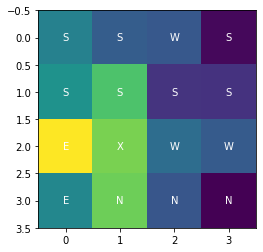

In [9]:
V = np.array([x for x in level_1_values.values()])
cells = [[x, y] for x in range(4) for y in range(4)]
policy = np.array([x for x in level_1_actions.values()]).reshape(4, 4)

fig, ax = plt.subplots()
im = ax.imshow(np.reshape(V, (-1, 4)))
for cell in cells:
    #     p = cell.getCoords()
    #     i = cell.getIndex()
    #     if not cell.isGoal():
    #         text = ax.text(p[1], p[0], str(policy[i]),
    #                    ha="center", va="center", color="w")
    if cell == env.get_super_manager_1(env.goal_init_state)[-1]:
        text = ax.text(cell[1], cell[0], "X",
                       ha="center", va="center", color="w")
    else:
        text = ax.text(cell[1], cell[0], policy[cell[0]][cell[1]],
                       ha="center", va="center", color="w")

plt.show()

In [10]:
level_1_actions

{0: 'S',
 1: 'S',
 2: 'W',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'E',
 9: 'Search',
 10: 'W',
 11: 'W',
 12: 'E',
 13: 'N',
 14: 'N',
 15: 'N'}

In [11]:
action_dict_r={action_dict[x]:x for x in action_dict.keys()}
action_dict_r

{'N': 0, 'S': 1, 'E': 2, 'W': 3, 'Search': 4}

In [12]:
action_level_2={}
for state in HQT_new.Q_table[2].keys():    
    loc= [int(state/8),int(state-8*int(state/8))]
    zz1=state
    action_level_2[zz1]={}
    manager=env.get_super_manager_1(loc)[1]
    s_1=manager[0]*4+manager[1]
    t=action_dict_r[level_1_actions[s_1]]
#     allowed_actions=env.get_possible_actions(loc,1)
    
    Qvalues={x:HQT_new.Q_table[2][zz1][t][x] for x in HQT_new.Q_table[2][zz1][t].keys()}
    Best_action=np.argmax([x for x in Qvalues.values()])
    Action_Value=np.max([x for x in Qvalues.values()])
    print(zz1,allowed_actions,Qvalues)
    action_level_2[zz1][t]={action_dict[Best_action]:Action_Value}

0 [0, 3] {0: -3.779966233612111, 1: -3.046290533911672, 2: -3.06637233683195, 3: -3.8962794858036713}
1 [0, 3] {0: -3.129304388034567, 1: -2.0853800577997648, 2: -7.541036034487327, 3: -3.894768357879019}
2 [0, 3] {0: -3.040374502105138, 1: -2.071254853855715, 2: -3.0749965253722635, 3: -8.305238831060123}
3 [0, 3] {0: -3.078022673728594, 1: -2.0689059762510476, 2: -12.453977311438027, 3: -3.0457051554048244}
4 [0, 3] {0: -2.1748181614395796, 1: -2.0878615128371583, 2: -3.20403797569567, 3: -1.1767281512102774}
5 [0, 3] {0: -3.1686203832057718, 1: -3.1245370967694797, 2: -8.253348776553263, 3: -2.1384582141591943}
6 [0, 3] {0: -4.1857344431653996, 1: -3.2689818203290684, 2: -4.141597410463288, 3: -7.128884449197638}
7 [0, 3] {0: -4.049658786183165, 1: -3.1486950279542634, 2: -3.9783740790124584, 3: -4.145859597487963}
8 [0, 3] {0: -3.7463867832928877, 1: -2.0443094666793393, 2: -2.078762050614475, 3: -2.994491838229171}
9 [0, 3] {0: -3.0961952000481445, 1: -1.1079931745699254, 2: -9.92

In [13]:
od2 = collections.OrderedDict(sorted(action_level_2.items()))
level_2_values={}
level_2_actions={}
for x1 in od2.keys():
    level_2_values[x1]={}
    level_2_actions[x1]={}
    for x2 in od2[x1].keys():
        

            level_2_values[x1]=[x3 for x3 in od2[x1][x2].values()][0]
            level_2_actions[x1]=[x3 for x3 in od2[x1][x2].keys()][0]

In [14]:
V

array([-81.65329474, -82.69497008, -82.83939769, -84.66612564,
       -81.1408272 , -79.60153149, -83.74971161, -83.75927265,
       -77.57713107, -79.03530938, -82.24442738, -82.7521066 ,
       -81.48523525, -79.18651406, -82.87446878, -84.82780591])

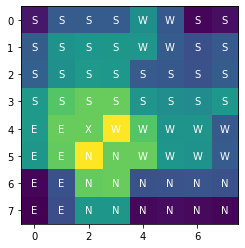

cccc


In [15]:
# levlel_2_policy={x:action_map[2][x][t] for x in action_map[2].keys()}
V = np.array([x for x in level_2_values.values()])
cells = [[x, y] for x in range(8) for y in range(8)]
policy = np.array([x for x in level_2_actions.values()]).reshape(8, 8)

fig, ax = plt.subplots()
im = ax.imshow(np.reshape(V, (-1, 8)))
for cell in cells:
    #     p = cell.getCoords()
    #     i = cell.getIndex()
    #     if not cell.isGoal():
    #         text = ax.text(p[1], p[0], str(policy[i]),
    #                    ha="center", va="center", color="w")
    if cell == env.goal_init_state:
        text = ax.text(cell[1], cell[0], "X",
                       ha="center", va="center", color="w")
    else:
        text = ax.text(cell[1], cell[0], policy[cell[0]][cell[1]],
                       ha="center", va="center", color="w")

plt.show()
print('cccc')


In [16]:
level_2_values

{0: -3.046290533911672,
 1: -2.0853800577997648,
 2: -2.071254853855715,
 3: -2.0689059762510476,
 4: -1.1767281512102774,
 5: -2.1384582141591943,
 6: -3.2689818203290684,
 7: -3.1486950279542634,
 8: -2.0443094666793393,
 9: -1.1079931745699254,
 10: -1.0467407390904595,
 11: -1.0420150469855787,
 12: -1.078064188305281,
 13: -2.0756596857701646,
 14: -2.2661745755985794,
 15: -2.1262614403405724,
 16: -1.9929638850661557,
 17: -1.1492128042769967,
 18: -0.9999999999999999,
 19: -1.0126654438569935,
 20: -2.0917397621511933,
 21: -2.1345762981920346,
 22: -2.254227152359792,
 23: -2.0450385834321394,
 24: -0.9931816900433875,
 25: -0.14958699563301528,
 26: 0.0,
 27: -0.001583894500509075,
 28: -1.0741627344980764,
 29: -1.2035018811265592,
 30: -1.24537621395349,
 31: -1.0249980566228918,
 32: -0.999999999884581,
 33: 0.0,
 34: 0,
 35: 0.9999999999999999,
 36: -0.16479560111359137,
 37: -1.0870207701124135,
 38: -1.0909623648780853,
 39: -2.1204263501364267,
 40: -1.0290264631127435

In [17]:
action_level_2

{0: {2: {'E': -3.3695165150987885}},
 1: {2: {'E': -2.3420224780786905}},
 2: {2: {'E': -2.2633046280949713}},
 3: {2: {'E': -1.2176065487634806}},
 4: {2: {'E': -1.1054206152210744}},
 5: {2: {'E': -0.10158599861632439}},
 6: {1: {'S': -1.0554211313513546}},
 7: {1: {'S': -1.1215093897037303}},
 8: {2: {'E': -3.2230028286200207}},
 9: {2: {'E': -2.191076863572321}},
 10: {2: {'E': -2.1088784764019195}},
 11: {2: {'E': -1.0892278119672503}},
 12: {2: {'E': -1.0925751645349386}},
 13: {2: {'E': -0.19338963991507402}},
 14: {1: {'S': -0.1829943004183486}},
 15: {1: {'S': -0.07111820998983405}},
 16: {2: {'E': -3.195935661582084}},
 17: {2: {'E': -2.199803244372532}},
 18: {0: {'N': -0.06051311730681235}},
 19: {0: {'N': -0.1302153913424965}},
 20: {2: {'E': -1.0866382742962273}},
 21: {2: {'E': -0.08987382892319899}},
 22: {4: {'S': 0.0}},
 23: {4: {'S': -0.9999999999999998}},
 24: {2: {'E': -4.182902217967536}},
 25: {2: {'N': -3.203288814160414}},
 26: {0: {'N': -1.0979858872572188}},


In [18]:
for i in range(1, env.n_layers + 1, 1):
    action_map[i] = {}
    q_values[i] = {}
    states = 4 ** (i + 1)
    for s in range(states):
        if i==1:
            s1=s*4+s%4
            loc= [int(s1/8),int(s1-8*int(s1/8))]
            zz1 = int(int(s1 / 8) / 2) * 4 + int((s1 % 8) / 2)

        else:
            s1=s
            
        allowed_actions=env.get_possible_actions(loc,i)
        print(zz1,s1,loc,allowed_actions)
        action_map[i][zz1] = {}
        q_values[i][zz1] = {}

        if i == 1:
            t = 4
        else:
            zz = int(int(s / 8) / 2) * 4 + int((s % 8) / 2)

            x_v = HQT_new.Q_table[i - 1][zz][4]
            t = np.argmax([x for x in x_v.values()][:4])
        #         for t in range(env.na+1):
        x = HQT_new.Q_table[i][s][t]
        t1 = action_dict[t]
        qs=[HQT_new.Q_table[i][s][t][x] for x in HQT_new.Q_table[i][s][t].keys() if x in allowed_actions]
        action_idx=np.argmax(qs)
        if i!=env.n_layers:
            if env.get_super_manager_1(loc)[i]!=env.get_super_manager_1(env.goal_init_state)[i]:
                assert allowed_actions[action_idx]!=4
        action = action_dict[allowed_actions[action_idx]]
        #             print(x,x.values(),action)
        print(s,action)
        action_map[i][zz1][t1] = copy.copy(action)
        q_values[i][zz1][t1] = np.max(qs)

0 0 [0, 0] [1, 2]
0 E
2 5 [0, 5] [1, 2, 3]
1 E
1 10 [1, 2] [1, 2, 3]
2 E
3 15 [1, 7] [1, 3]
3 S
4 16 [2, 0] [0, 1, 2]
4 E
6 21 [2, 5] [0, 1, 2, 3]
5 N
5 26 [3, 2] [0, 1, 2, 3]
6 E
7 31 [3, 7] [4]
7 Search
8 32 [4, 0] [0, 1, 2]
8 E
10 37 [4, 5] [0, 1, 2, 3]
9 E
9 42 [5, 2] [0, 1, 2, 3]
10 N
11 47 [5, 7] [0, 1, 3]
11 N
12 48 [6, 0] [0, 2]
12 E
14 53 [6, 5] [0, 2, 3]
13 W
13 58 [7, 2] [0, 2, 3]
14 N
15 63 [7, 7] [0, 3]
15 W
15 0 [7, 7] [0, 1, 2, 3]
0 N
15 1 [7, 7] [0, 1, 2, 3]
1 N
15 2 [7, 7] [0, 1, 2, 3]
2 N
15 3 [7, 7] [0, 1, 2, 3]
3 N
15 4 [7, 7] [0, 1, 2, 3]
4 N
15 5 [7, 7] [0, 1, 2, 3]
5 N
15 6 [7, 7] [0, 1, 2, 3]
6 N
15 7 [7, 7] [0, 1, 2, 3]
7 N
15 8 [7, 7] [0, 1, 2, 3]
8 N
15 9 [7, 7] [0, 1, 2, 3]
9 N
15 10 [7, 7] [0, 1, 2, 3]
10 N
15 11 [7, 7] [0, 1, 2, 3]
11 N
15 12 [7, 7] [0, 1, 2, 3]
12 N
15 13 [7, 7] [0, 1, 2, 3]
13 N
15 14 [7, 7] [0, 1, 2, 3]
14 N
15 15 [7, 7] [0, 1, 2, 3]
15 N
15 16 [7, 7] [0, 1, 2, 3]
16 N
15 17 [7, 7] [0, 1, 2, 3]
17 N
15 18 [7, 7] [0, 1, 2, 3]
18 N
15 19 

In [76]:
action_map

{1: {0: {'Search': 'E'},
  2: {'Search': 'Search'},
  1: {'Search': 'S'},
  3: {'Search': 'W'},
  4: {'Search': 'E'},
  6: {'Search': 'N'},
  5: {'Search': 'N'},
  7: {'Search': 'N'},
  8: {'Search': 'N'},
  10: {'Search': 'N'},
  9: {'Search': 'N'},
  11: {'Search': 'N'},
  12: {'Search': 'N'},
  14: {'Search': 'W'},
  13: {'Search': 'N'},
  15: {'Search': 'N'}},
 2: {0: {'N': 'N'},
  1: {'N': 'N'},
  2: {'S': 'E'},
  3: {'S': 'E'},
  4: {'N': 'N'},
  5: {'N': 'N'},
  6: {'N': 'N'},
  7: {'N': 'N'},
  8: {'N': 'N'},
  9: {'N': 'N'},
  10: {'S': 'N'},
  11: {'S': 'N'},
  12: {'N': 'N'},
  13: {'N': 'N'},
  14: {'N': 'N'},
  15: {'N': 'N'},
  16: {'W': 'N'},
  17: {'W': 'N'},
  18: {'N': 'N'},
  19: {'N': 'N'},
  20: {'N': 'N'},
  21: {'N': 'N'},
  22: {'E': 'N'},
  23: {'E': 'N'},
  24: {'W': 'N'},
  25: {'W': 'N'},
  26: {'N': 'N'},
  27: {'N': 'N'},
  28: {'N': 'N'},
  29: {'N': 'N'},
  30: {'E': 'N'},
  31: {'E': 'N'},
  32: {'W': 'N'},
  33: {'W': 'N'},
  34: {'N': 'N'},
  35: {'N'

In [65]:
import pprint as pprint

In [66]:
pprint.pprint({x:HQT_new.Visit_table[1][x][4] for x in HQT_new.Visit_table[1].keys()})

{0: {0: 0, 1: 150, 2: 2855, 3: 0, 4: 0},
 1: {0: 0, 1: 2881, 2: 2414, 3: 1368, 4: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 6209},
 3: {0: 0, 1: 134, 2: 0, 3: 2272, 4: 0},
 4: {0: 1494, 1: 91, 2: 1051, 3: 0, 4: 0},
 5: {0: 3084, 1: 109, 2: 753, 3: 129, 4: 0},
 6: {0: 3310, 1: 124, 2: 108, 3: 112, 4: 0},
 7: {0: 1545, 1: 96, 2: 0, 3: 896, 4: 0},
 8: {0: 1668, 1: 110, 2: 857, 3: 0, 4: 0},
 9: {0: 1870, 1: 64, 2: 74, 3: 213, 4: 0},
 10: {0: 1200, 1: 61, 2: 62, 3: 445, 4: 0},
 11: {0: 1569, 1: 80, 2: 0, 3: 101, 4: 0},
 12: {0: 1582, 1: 0, 2: 117, 3: 0, 4: 0},
 13: {0: 83, 1: 0, 2: 60, 3: 856, 4: 0},
 14: {0: 764, 1: 0, 2: 58, 3: 54, 4: 0},
 15: {0: 829, 1: 0, 2: 0, 3: 66, 4: 0}}


In [67]:
pprint.pprint({x:HQT_new.Q_table[1][x][4] for x in HQT_new.Q_table[1].keys()})

{0: {0: 0, 1: -5.8165244751720975, 2: -0.5055258571272357, 3: 0, 4: 0},
 1: {0: 0, 1: 1, 2: 1, 3: 0.2894913809575881, 4: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1},
 3: {0: 0, 1: -6.152283502977846, 2: 0, 3: -2.5621000010882824, 4: 0},
 4: {0: -5.774457185688126,
     1: -8.49577245913674,
     2: -3.8172235576891045,
     3: 0,
     4: 0},
 5: {0: -2.6989853764883973,
     1: -8.489848344998256,
     2: -4.814800703413434,
     3: -5.812456159853806,
     4: 0},
 6: {0: -2.1582003820073155,
     1: -6.554716405905925,
     2: -6.4722686039475334,
     3: -4.7789805596735935,
     4: 0},
 7: {0: -4.087354152855925,
     1: -8.330744214602351,
     2: 0,
     3: -4.341742247171357,
     4: 0},
 8: {0: -6.195032385124688,
     1: -9.806488495815048,
     2: -6.443722371541964,
     3: 0,
     4: 0},
 9: {0: -5.225475405886428,
     1: -11.797991296830288,
     2: -9.700946578126048,
     3: -9.334734051398165,
     4: 0},
 10: {0: -3.8437500725690943,
      1: -9.68591909739592,
      2: -9.

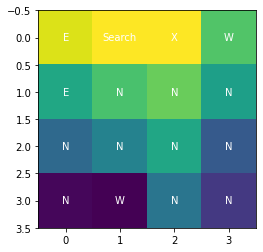

ValueError: cannot reshape array of size 1 into shape (8,8)

In [68]:


level_1_decisions = {x: action_map[1][x]['Search'] for x in action_map[1].keys()}
level_1_values = {x: q_values[1][x]['Search'] for x in q_values[1].keys() }

# level_2_policy={x:action_map[2][x][t] for x in action_map[2].keys()}
level_1_decisions
V = np.array([x for x in level_1_values.values()])
cells = [[x, y] for x in range(4) for y in range(4)]
policy = np.array([x for x in level_1_decisions.values()]).reshape(4, 4)

fig, ax = plt.subplots()
im = ax.imshow(np.reshape(V, (-1, 4)))
for cell in cells:
    #     p = cell.getCoords()
    #     i = cell.getIndex()
    #     if not cell.isGoal():
    #         text = ax.text(p[1], p[0], str(policy[i]),
    #                    ha="center", va="center", color="w")
    if cell == env.get_super_manager_1(env.goal_init_state)[-1]:
        text = ax.text(cell[1], cell[0], "X",
                       ha="center", va="center", color="w")
    else:
        text = ax.text(cell[1], cell[0], policy[cell[0]][cell[1]],
                       ha="center", va="center", color="w")

plt.show()

level_2_decisions = [[x for x in action_map[2][x].values()][0] for x in action_map[2].keys()]
level_2_values = [[x for x in q_values[2][x].values()][0] for x in q_values[2].keys()]

# levlel_2_policy={x:action_map[2][x][t] for x in action_map[2].keys()}
V = level_2_values
cells = [[x, y] for x in range(8) for y in range(8)]
policy = np.array([x for x in level_2_decisions]).reshape(8, 8)

fig, ax = plt.subplots()
im = ax.imshow(np.reshape(V, (-1, 8)))
for cell in cells:
    #     p = cell.getCoords()
    #     i = cell.getIndex()
    #     if not cell.isGoal():
    #         text = ax.text(p[1], p[0], str(policy[i]),
    #                    ha="center", va="center", color="w")
    if cell == env.goal_init_state:
        text = ax.text(cell[1], cell[0], "X",
                       ha="center", va="center", color="w")
    else:
        text = ax.text(cell[1], cell[0], policy[cell[0]][cell[1]],
                       ha="center", va="center", color="w")

plt.show()
print('cccc')




In [42]:
env.get_super_manager_1(env.goal_init_state)

[[0, 0], [0.0, 2.0]]

In [74]:
action_map

{1: {0: {'Search': 'E'},
  2: {'Search': 'Search'},
  1: {'Search': 'S'},
  3: {'Search': 'W'},
  4: {'Search': 'E'},
  6: {'Search': 'N'},
  5: {'Search': 'N'},
  7: {'Search': 'N'},
  8: {'Search': 'N'},
  10: {'Search': 'N'},
  9: {'Search': 'N'},
  11: {'Search': 'N'},
  12: {'Search': 'N'},
  14: {'Search': 'W'},
  13: {'Search': 'N'},
  15: {'Search': 'N'}},
 2: {15: {'S': 'N'}}}

In [43]:
level_1_values

{0: -0.5055258571272357,
 1: 0,
 2: 0,
 3: -2.5621000010882824,
 4: -3.8172235576891045,
 5: -2.6989853764883973,
 6: -2.1582003820073155,
 7: -4.087354152855925,
 8: -6.195032385124688,
 9: -5.225475405886428,
 10: -3.8437500725690943,
 11: -6.723638157379154,
 12: -9.242687541263761,
 13: -9.398980062119005,
 14: -5.746501497300566,
 15: -7.832608767355923}

In [45]:
{x:q_values[1][x]['Search'] for x in q_values[1].keys() }

{0: -0.5055258571272357,
 1: 0,
 2: 0,
 3: -2.5621000010882824,
 4: -3.8172235576891045,
 5: -2.6989853764883973,
 6: -2.1582003820073155,
 7: -4.087354152855925,
 8: -6.195032385124688,
 9: -5.225475405886428,
 10: -3.8437500725690943,
 11: -6.723638157379154,
 12: -9.242687541263761,
 13: -9.398980062119005,
 14: -5.746501497300566,
 15: -7.832608767355923}

In [48]:
action_map

{1: {0: {'Search': 'E'},
  1: {'Search': 'Search'},
  2: {'Search': 'S'},
  3: {'Search': 'W'},
  4: {'Search': 'E'},
  5: {'Search': 'N'},
  6: {'Search': 'N'},
  7: {'Search': 'N'},
  8: {'Search': 'N'},
  9: {'Search': 'N'},
  10: {'Search': 'N'},
  11: {'Search': 'N'},
  12: {'Search': 'N'},
  13: {'Search': 'W'},
  14: {'Search': 'N'},
  15: {'Search': 'N'}},
 2: {0: {'N': 'N'},
  1: {'N': 'N'},
  2: {'S': 'E'},
  3: {'S': 'E'},
  4: {'N': 'N'},
  5: {'N': 'N'},
  6: {'N': 'N'},
  7: {'N': 'N'},
  8: {'N': 'N'},
  9: {'N': 'N'},
  10: {'S': 'N'},
  11: {'S': 'N'},
  12: {'N': 'N'},
  13: {'N': 'N'},
  14: {'N': 'N'},
  15: {'N': 'N'},
  16: {'W': 'N'},
  17: {'W': 'N'},
  18: {'N': 'N'},
  19: {'N': 'N'},
  20: {'N': 'N'},
  21: {'N': 'N'},
  22: {'E': 'N'},
  23: {'E': 'N'},
  24: {'W': 'N'},
  25: {'W': 'N'},
  26: {'N': 'N'},
  27: {'N': 'N'},
  28: {'N': 'N'},
  29: {'N': 'N'},
  30: {'E': 'N'},
  31: {'E': 'N'},
  32: {'W': 'N'},
  33: {'W': 'N'},
  34: {'N': 'N'},
  35: {'N'